# 4장 과제

## Problem 1

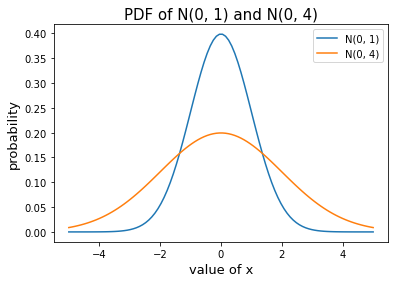

In [189]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# -5부터 5까지 100개의 실수값을 균등하게 포함한 np array 생성
x = np.linspace(-5, 5, 100)

# 평균 0, 표준편차 1인 확률밀도함수
fx1 = norm.pdf(x, loc=0, scale=1)
plt.plot(x, fx1)

# 평균 1, 표준편차 2인 확률밀도함수
fx4 = norm.pdf(x, loc=0, scale=2)
plt.plot(x, fx4)

# plot의 제목과 x, y 레이블을 지정
plt.title("PDF of N(0, 1) and N(0, 4)", fontsize=15)
plt.xlabel("value of x", fontsize=13)
plt.ylabel("probability", fontsize=13)

# 범례 레이블을 추가
plt.legend(['N(0, 1)', 'N(0, 4)'])

# plot 보여줌
plt.show()

두 그래프 모두 중심이 0으로 같다.  
N(0, 4)의 경우 N(0, 1)에 비해 표준편차가 크므로 좌우로 더 퍼진 모양을 보인다.  
밑면적은 1로 동일해야하므로 N(0, 4)의 피크가 N(0, 1)에 비해 더 낮은 모습을 확인할 수 있다.

## Problem 2

In [191]:
# N(10, 4)
# Pr(X <= 12)
fc12 = norm.cdf(12, loc=10, scale=2)

# Pr(X <= 6)
fc6 = norm.cdf(6, loc=10, scale=2)

# fc12와 fc6의 차를 구함
prob_answer = fc12 - fc6

# 정답 출력
print("Pr(6 <= X <= 12)의 값: ", prob_answer)

Pr(6 <= X <= 12)의 값:  0.8185946141203637


## Problem 3

In [192]:
# N(0, 25)의 0.05, 0.95 분위수를 각각 구함
pp1 = norm.ppf(0.05, loc=0, scale=5)
pp2 = norm.ppf(0.95, loc=0, scale=5)

# 계산한 분위수를 출력함
print("0.05 분위수: ", pp1)
print("0.95 분위수: ", pp2)

0.05 분위수:  -8.224268134757365
0.95 분위수:  8.224268134757361


In [193]:
# 절대값이 같은지 여부를 확인
isSame = (np.abs(pp1) == np.abs(pp2))
print("0.05 분위수와 0.95 분위수의 절대값이 같다는 명제는 " + str(isSame) + "이다.")
print("차이:", np.abs(pp1 + pp2))

0.05 분위수와 0.95 분위수의 절대값이 같다는 명제는 False이다.
차이: 3.552713678800501e-15


이론적으로는 N(0, 25)의 확률밀도함수는 y축에 대해 대칭이므로  
0.05 분위수와 0.95 분위수는 절대값은 같고 부호는 반대이다.  
다만, norm.ppf가 제공하는 값에는 작지만 오차가 분명 존재하므로  
0.05 분위수와 0.95 분위수의 절대값에 미세한 차이가 발생한 것이다.  
따라서 값을 비교해보면 False가 나오게 된다.  
다만 그 차이는 약 3.55*10^(-15)으로 매우 작은 값이다

## Problem 4

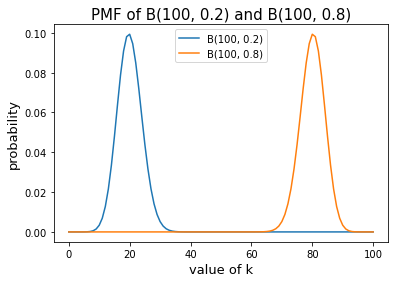

In [194]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

# 0부터 100까지의 정수를 포함하는 k를 생성
k = np.arange(0, 101)

# B(100, 0.2), B(100, 0.8)의 확률질량함수를 각각 계산함
fx1 = binom.pmf(k, 100, 0.2)
fx2 = binom.pmf(k, 100, 0.8)

# fx1과 fx2를 plot함
plt.plot(k, fx1)
plt.plot(k, fx2)

# plot의 제목, x, y 레이블을 지정
plt.title('PMF of B(100, 0.2) and B(100, 0.8)', fontsize=15)
plt.xlabel('value of k', fontsize=13)
plt.ylabel('probability', fontsize=13)

# 범례 레이블을 추가
plt.legend(['B(100, 0.2)', 'B(100, 0.8)'])
plt.show()

두 그래프는 k=50에 대해 서로 대칭적인 형태를 보인다.  
각각 k=20, k=80 일 때 최고점이 형성되어있다.

## Problem 5

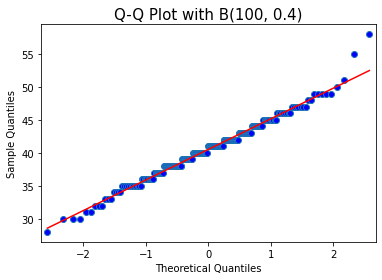

In [204]:
from statsmodels.graphics.gofplots import ProbPlot

# 필요에 따라 np.random.seed(0)으로 seed를 고정할 수 있음

# B(100, 0.4)에서 200개의 난수를 생성
sample = binom.rvs(100, 0.4, size=200)

# Q-Q plot을 그려준다
QQ = ProbPlot(sample)
plot = QQ.qqplot(line='s', color='C0', lw=1)
plt.title("Q-Q Plot with B(100, 0.4)", fontsize=15)
plt.show()

Q-Q Plot을 보면 정규분포의 분위수와 자료 분포의 분위수를 표현할 때 linear함을 알 수 있다.  
따라서 B(100, 0.4)는 정규분포로 근사할 수 있음을 안다.

## Problem 6

In [196]:
import pandas as pd

# bodydims.csv를 불러옴
bodydims = pd.read_csv("bodydims.csv")
bodydims.head()

,bii.di,che.de,elb.di,kne.di,age,wgt,hgt,sex
0,26.0,17.7,13.1,18.8,21,65.6,174.0,1
1,28.5,16.9,14.0,20.6,23,71.8,175.3,1
2,28.2,20.9,13.9,19.7,28,80.7,193.5,1
3,29.9,18.4,13.9,20.9,23,72.6,186.5,1
4,29.9,21.5,15.2,20.7,22,78.8,187.2,1


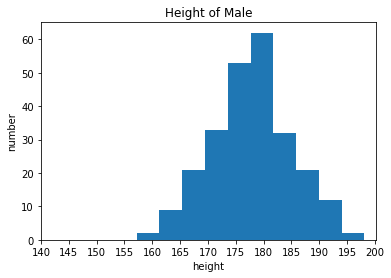

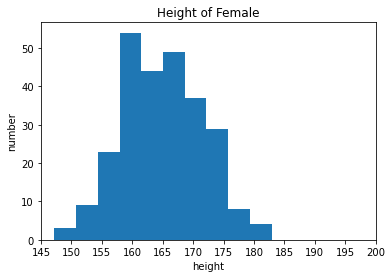

In [197]:
# 남성은 sex가 1, 여성은 0으로 구성됨
maleDims = bodydims[bodydims['sex']==1]
femaleDims = bodydims[bodydims['sex']==0]

# 남자의 키를 히스토그램으로 나타냄
plt.title('Height of Male')
plt.xlabel('height')
plt.ylabel('number')
plt.hist(maleDims['hgt'], bins=10)
plt.xticks(range(140, 205, 5))
plt.show()

# 여자의 키를 히스토그램으로 나타냄
plt.title('Height of Female')
plt.xlabel('height')
plt.ylabel('number')
plt.hist(femaleDims['hgt'], bins=10)
plt.xticks(range(145, 205, 5))
plt.show()


In [198]:
# quantile of Male
maleH = maleDims['hgt']
Q1, Q2, Q3 = maleH.quantile(.25), maleH.quantile(.5), maleH.quantile(.75)
print('남자 키: value of Q1, Q2, Q3:', Q1, Q2, Q3)

# quantile of Female
femaleH = femaleDims['hgt']
Q1, Q2, Q3 = femaleH.quantile(.25), femaleH.quantile(.5), femaleH.quantile(.75)
print('여자 키: value of Q1, Q2, Q3:', Q1, Q2, Q3)


남자 키: value of Q1, Q2, Q3: 172.9 177.8 182.65
여자 키: value of Q1, Q2, Q3: 160.0 164.5 169.5


## 남자 집단이 키가 더 크다.
히스토그램 상으로도 남자의 키는 [170, 185]에 밀집한 반면  
여자의 키는 [160, 170]에 밀집하여 남자의 키가 더 큰 것을 알 수 있다.
* x축은 동일하게 설정하였는데 남자의 히스토그램이 오른쪽으로 더 치우쳐저 있다.

또한 사분위수를 보아도 남자의 키가 여자의 키에 비해 전반적으로 더 큰 것을 알 수 있다.

## Problem 7

In [206]:
# bmi 수치를 계산하자
# bmi 수치는 몸무게(kg) / 키(m) ** 2 로 나타난다.
# hgt column의 값은 cm로 주어지므로 변환이 필요하다.

# 남자의 bmi를 계산한다.
bmiMale = maleDims['wgt'] / ((maleDims['hgt'] * 0.01) ** 2)
bmi_m = pd.DataFrame(bmiMale, columns=['BMI'])

In [200]:
# 여자의 bmi를 계산한다.
bmiFemale = femaleDims['wgt'] / ((femaleDims['hgt'] * 0.01) ** 2)
bmi_f = pd.DataFrame(bmiFemale, columns=['BMI'])

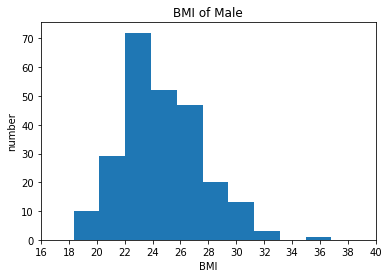

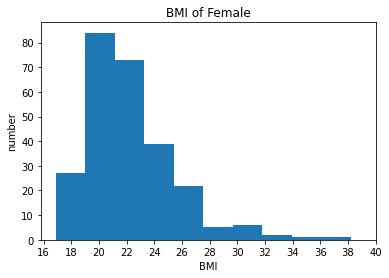

In [201]:
# 남자의 BMI를 히스토그램으로 나타냄
plt.title('BMI of Male')
plt.xlabel('BMI')
plt.ylabel('number')
plt.hist(bmi_m, bins=10)
plt.xticks(range(16, 42, 2))
plt.show()

# 여자의 BMI를 히스토그램으로 나타냄
plt.title('BMI of Female')
plt.xlabel('BMI')
plt.ylabel('number')
plt.hist(bmi_f, bins=10)
plt.xticks(range(16, 42, 2))
plt.show()


In [202]:
# quantile of Male
Q1, Q2, Q3 = bmi_m['BMI'].quantile(.25), bmi_m['BMI'].quantile(.5), bmi_m['BMI'].quantile(.75)
print('남자 BMI: value of Q1, Q2, Q3: {:.3f}, {:.3f}, {:.3f}'.format(Q1, Q2, Q3))

# quantile of Female
Q1, Q2, Q3 = bmi_f['BMI'].quantile(.25), bmi_f['BMI'].quantile(.5), bmi_f['BMI'].quantile(.75)
print('여자 BMI: value of Q1, Q2, Q3: {:.3f}, {:.3f}, {:.3f}'.format(Q1, Q2, Q3))


남자 BMI: value of Q1, Q2, Q3: 22.805, 24.304, 26.434
여자 BMI: value of Q1, Q2, Q3: 20.016, 21.783, 23.629


## 남자의 BMI가 더 크다

히스토그램을 보면 남자, 여자 모두 xticks는 동일하게 설정되어있다.  
이때 남자의 BMI를 나타낸 히스토그램이 여자의 히스토그램보다 개형이 오른쪽에 위치하고 있다.  
또한 남자 BMI의 피크는 약 [22, 24]에 위치한 반면 여자는 [20, 22] 부근에 위치해 있다.  

나아가 사분위수를 보아도 남자의 BMI가 여자에 비해 조금 더 큰 것을 볼 수 있다.  
